# Linear regression model to predict the prices of the houses

## Kaggle house price challenge
### Dataset previously treated

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('../Dados/HousePrices_HalfMil.csv', sep=';')
df

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


In [4]:
df.isnull().sum()

precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


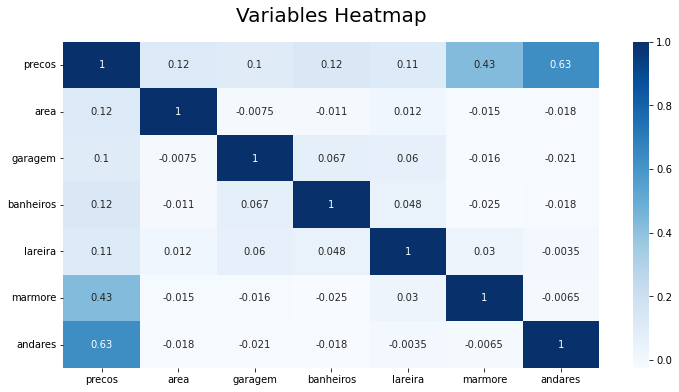

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap='Blues')
plt.title('Variables Heatmap', 
          fontsize = 20, 
          pad = 20)
plt.show()

### Graphical Analysis

<AxesSubplot:title={'center':'Property Price'}, ylabel='$'>

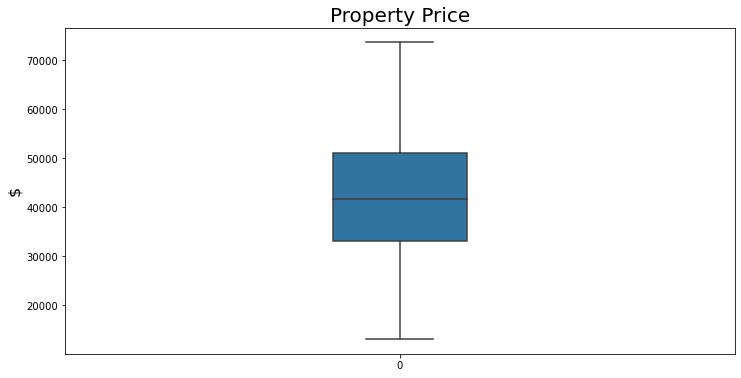

In [8]:
ax = sns.boxplot(data=df['precos'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Property Price', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='$', ylabel='Frequency'>

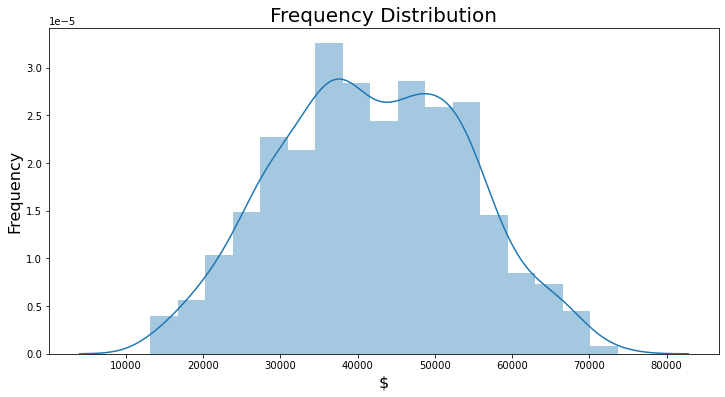

In [9]:
#Frequency distribution of the dependent variable (y)
ax = sns.distplot(df['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('$', fontsize=16)
ax

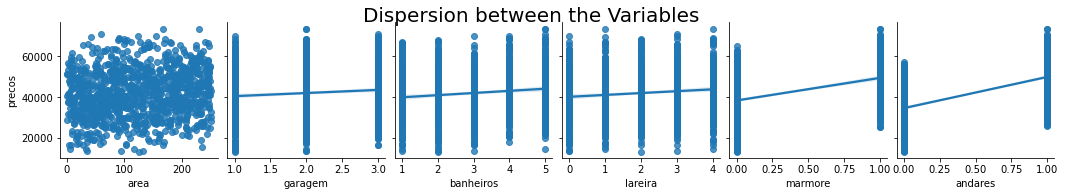

In [10]:
ax = sns.pairplot(df, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersion between the Variables', fontsize=20, y=1.05)
ax

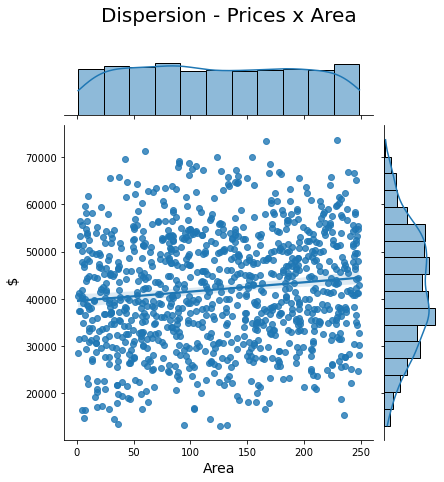

In [11]:
ax = sns.jointplot(x= 'area' , y= 'precos' , data=df, kind='reg')
ax.fig.suptitle('Dispersion - Prices x Area ' , fontsize=20 , y= 1.10)
ax.set_axis_labels('Area' , ' $', fontsize=14)
ax

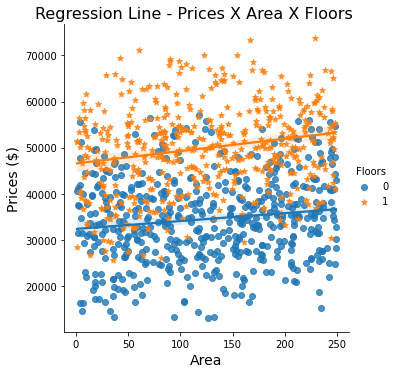

In [12]:
ax = sns.lmplot(x="area", y="precos", data=df, hue="andares", markers=['o', '*'], legend=False)
ax.fig.suptitle('Regression Line - Prices X Area X Floors', fontsize=16, y=1.02)
ax.set_xlabels("Area", fontsize=14)
ax.set_ylabels("Prices ($)", fontsize=14)
ax.add_legend(title="Floors")
ax

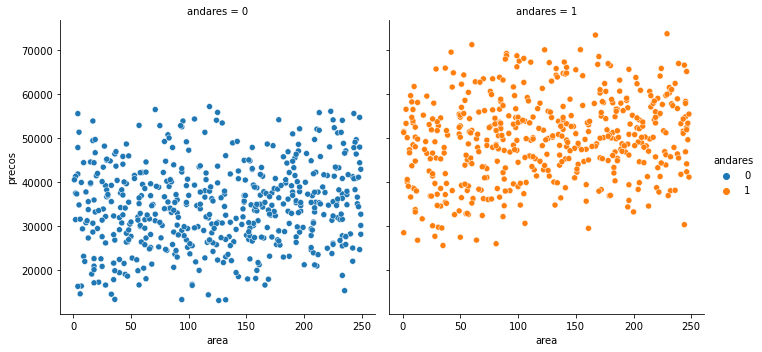

In [13]:
sns.relplot(x='area', y='precos', hue='andares', col='andares', data=df)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = df['precos']
X = df[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

model = LinearRegression()
model.fit(X_train, y_train)

print('R² = {}' .format(model.score(X_train, y_train).round(2)))

R² = 0.64


In [15]:
#Generating predictions for test data using the predict() method
#Getting the coefficient of determination (R²) for test data
y_pred = model.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, y_pred).round(2))

R² = 0.67


In [16]:
#Create a simple simulator for test the model
area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

enter_data = [[area, garagem, banheiros, lareira, marmore, andares]]

print('Price of the house $ {0:.2f}' .format(model.predict(enter_data)[0]))

Price of the house $ 46389.80


In [17]:
#Getting metrics for the model
EQM = metrics.mean_squared_error(y_test, y_pred).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2)
R2 = metrics.r2_score(y_test, y_pred).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Metrics'])

,Metrics
EQM,50197019.50
REQM,7084.99
R²,0.67


In [18]:
#Saving the model
import pickle
output = open('house_price_model', 'wb')
pickle.dump(model, output)
output.close()

In [21]:
#Making a interative simulator for test the model
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

#Control of the formulary
area = widgets.Text(description="Area")
garagem = widgets.Text(description="Garage")
banheiros = widgets.Text(description="Restroom")
lareira = widgets.Text(description="Fireplace")
marmore = widgets.Text(description="Marble?")
andares = widgets.Text(description="Floors?")

button = widgets.Button(description="Simulate")

#Control position 
left = VBox([area, banheiros, marmore])
right = VBox([garagem, lareira, andares])
inputs = HBox([left, right])

#Simulator function
def simulator(sender):
    enter=[[
                float(area.value if area.value else 0), 
                float(garagem.value if garagem.value else 0), 
                float(banheiros.value if banheiros.value else 0), 
                float(lareira.value if lareira.value else 0), 
                float(marmore.value if marmore.value else 0), 
                float(andares.value if andares.value else 0)
             ]]
    print('$ {0:.2f}'.format(model.predict(enter)[0]))
    
#Assigning the function on the button
button.on_click(simulator)

In [22]:
display(inputs, button)

Button(description='Simulate', style=ButtonStyle())

$ 49448.51
$ 46986.04
$ 61847.63
